In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#Reading dataset from the CSV file
with open("/content/titanic-passengers (1).csv", 'r') as file:
    df = pd.read_csv(file, sep=";")


In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data cleaning



In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Filling missing values in 'Embarked' column with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
# The 'Cabin' column is dropped from the DataFrame because it contains a large number of missing values
df = df.drop("Cabin", axis=1)

In [ ]:
# Filling missing values in 'Age' column with the mode
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Encoding columns using LabelEncoder
label_encoder = LabelEncoder()
df["Survived"] = label_encoder.fit_transform(df["Survived"])
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])
df["Ticket"] = label_encoder.fit_transform(df["Ticket"])

In [ ]:
#drop useless
df = df.drop("Name", axis=1)
df = df.drop("PassengerId", axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [ ]:
df.corrwith(df["Survived"])

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.052872
SibSp      -0.035322
Parch       0.081629
Ticket     -0.164549
Fare        0.257307
Embarked   -0.167675
dtype: float64

# Data Visualization

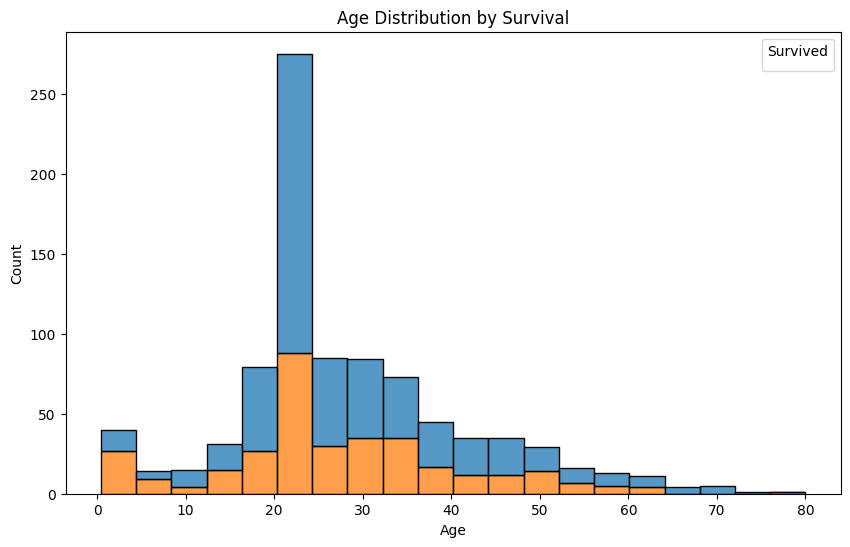

In [ ]:
import seaborn as sns
# Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

*------This histogram shows that most of the passengers are between 18 to 40 years old and the majority of the dead was in their early 20s.*

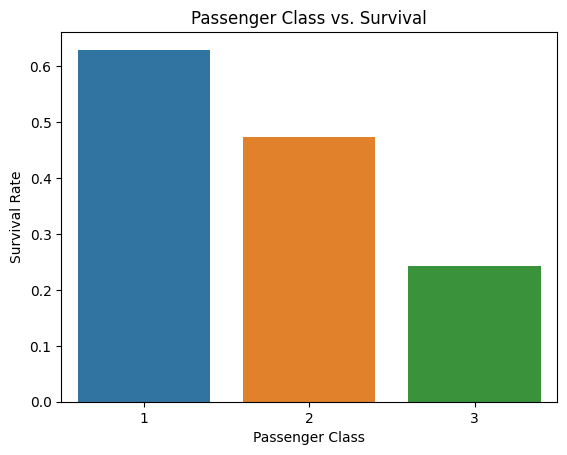

In [ ]:
#Passenger Class vs. Survival
class_survival =df.groupby('Pclass')['Survived'].mean()
sns.barplot(x=class_survival.index, y=class_survival.values)
plt.title("Passenger Class vs. Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

*-------According to this bar chart first class passengers had the highest rate of survival with 60%. while both second and third class had a survival rate below the half *

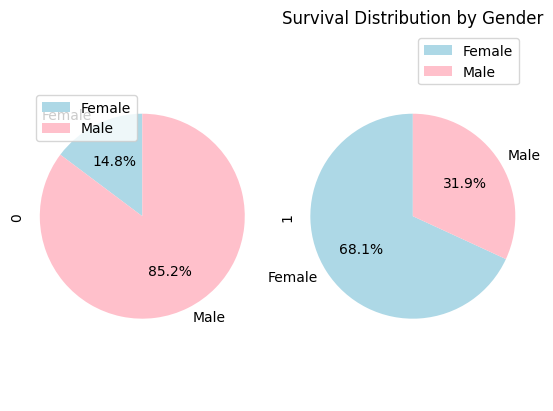

In [ ]:
# Survival Distribution by Gender
colors = ['#ADD8E6', '#FFC0CB']
gender_survival = df.groupby('Sex')['Survived'].value_counts().unstack()
gender_survival.plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, labels=['Female', 'Male'], colors=colors)
plt.title("Survival Distribution by Gender")
plt.axis('equal')
plt.show()


-------This pie chart shows that the majority of the dead were Male

# Machine Learning

In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
#features extraction
x= df[["Pclass","Sex","Embarked", "Fare", "Ticket","Parch"]]
y= df["Survived"]
#splitting data with test size of 25%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)


# Part 1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
#build our logistic model
logreg = LogisticRegression()
#fitting training data
logreg.fit(x_train, y_train)
#testing model’s performance
y_pred  = logreg.predict(x_test)
LR_score= accuracy_score(y_pred, y_test)
LR_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8251121076233184

# confusion matrix

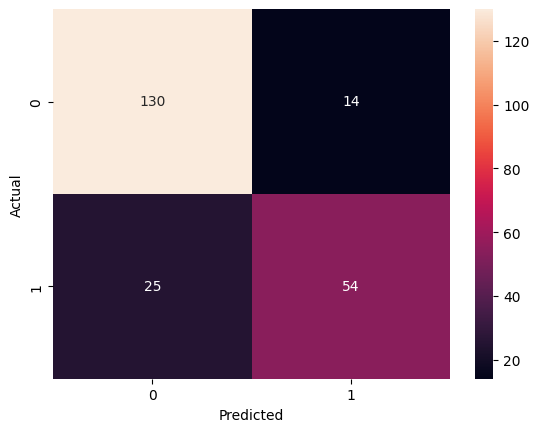

In [ ]:
import seaborn as sns
#Use confusion matrix to validate the model
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='d');

54 correctly classified as going to survive

130 are correctly classified as going to be dead

14 false positives

25 false negatives

# ROC/AUC

ROC (Receiver Operating Characteristics) curves make it easy to identify the best threshhold for making a decision

AUC ( Area under curve) can help you decide which categorization method is better

* ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1*

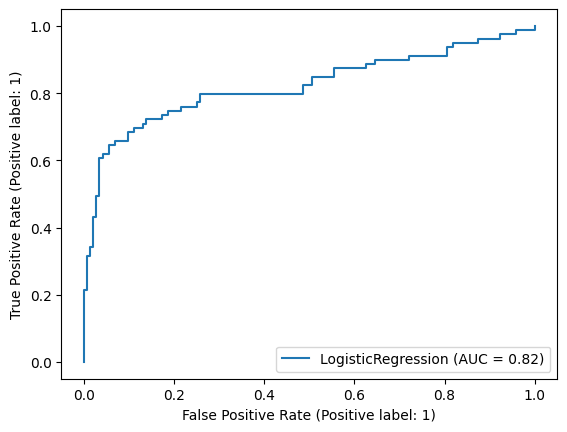

In [ ]:
#Plotting the ROC Curve
RocCurveDisplay.from_estimator(logreg, x_test, y_test)
plt.show()

# Part 2 KNN

K-Nearest-Neighbor algorithm

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(x_train, y_train)
  # Make predictions
y_pred = knn.predict(x_test)
KNN_score = accuracy_score(y_pred, y_test)
KNN_score

0.6412556053811659

In [ ]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.61
Accuracy for k= 2 is: 0.62
Accuracy for k= 3 is: 0.62
Accuracy for k= 4 is: 0.63
Accuracy for k= 5 is: 0.62
Accuracy for k= 6 is: 0.63
Accuracy for k= 7 is: 0.61
Accuracy for k= 8 is: 0.65
Accuracy for k= 9 is: 0.63
Accuracy for k= 10 is: 0.65
Accuracy for k= 11 is: 0.65
Accuracy for k= 12 is: 0.65
Accuracy for k= 13 is: 0.64
Accuracy for k= 14 is: 0.65
Accuracy for k= 15 is: 0.63
Accuracy for k= 16 is: 0.66
Accuracy for k= 17 is: 0.64
Accuracy for k= 18 is: 0.66
Accuracy for k= 19 is: 0.63
Accuracy for k= 20 is: 0.67
Accuracy for k= 21 is: 0.65
Accuracy for k= 22 is: 0.64
Accuracy for k= 23 is: 0.65
Accuracy for k= 24 is: 0.66
Accuracy for k= 25 is: 0.64
Accuracy for k= 26 is: 0.67
Accuracy for k= 27 is: 0.62
Accuracy for k= 28 is: 0.65
Accuracy for k= 29 is: 0.61


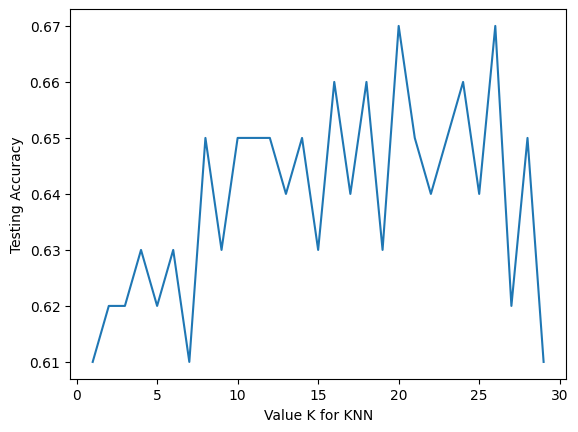

In [ ]:
# Optimal K Value Plot
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy');

** ==> Our k-Nearest Neighbors (k-NN) model, using an optimal
k value of 20, achieves an accuracy of 0.67. While demonstrating potential, further investigation is needed to improve accuracy for robust predictions.**

# Part 3:  Decision tree and random forest

**--------Decision tree--------**

In [ ]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(df)

In [ ]:
#applying tree algorithm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
treed = tree.DecisionTreeClassifier()
#fitting our model
treed.fit(x_train, y_train)   #fitting our model
y_pred=treed.predict(x_test)   # evaluating our model
DT_accuracy = accuracy_score(y_test, y_pred)
DT_accuracy

0.7668161434977578

In [ ]:
!pip install graphviz

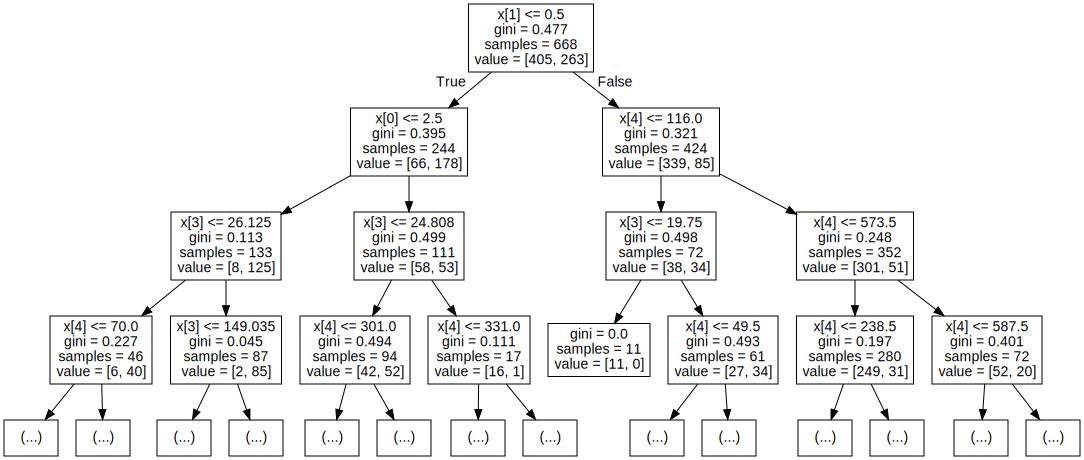

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
# DOT data
dot_data =tree.export_graphviz(treed, max_depth=3,out_file=None)

# Draw graph
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Change the decision tree parameters
tree_model_2 = DecisionTreeClassifier(
    criterion="gini",
    splitter="random",
    max_leaf_nodes=10,
    min_samples_leaf=4,
    max_depth=4)
tree_model_2.fit(x_train, y_train)
y_pred = tree_model_2.predict(x_test)
score2 = accuracy_score(y_test, y_pred)
score2


0.8071748878923767

In [ ]:
print(f"Decision tree Accuracy Score = {DT_accuracy}\nAccuracy Score after changing parameters = {score2}.")

Decision tree Accuracy Score = 0.7668161434977578
Accuracy Score after changing parameters = 0.8071748878923767.


* ==> By carefully tuning the hyperparameters we've managed to achieve a higher accuracy compared to the previous configuration.* *italicized text*



**--------Random Forest----------**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# First Random Forest model with 100 estimators
rf_model1 = RandomForestClassifier(n_estimators=10)
rf_model1.fit(x_train, y_train)
y_pred1 = rf_model1.predict(x_test)
RF_score1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy Score (100 estimators): {RF_score1:.4f}")

# Second Random Forest model with 200 estimators
rf_model2 = RandomForestClassifier(n_estimators=50)
rf_model2.fit(x_train, y_train)
y_pred2 = rf_model2.predict(x_test)
RF_score2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy Score (200 estimators): {RF_score2:.4f}")

Accuracy Score (100 estimators): 0.7982
Accuracy Score (200 estimators): 0.8117


# Making a summary graph which resume all accuracies of each model(logistic regression, knn , Decision tree and random forest)

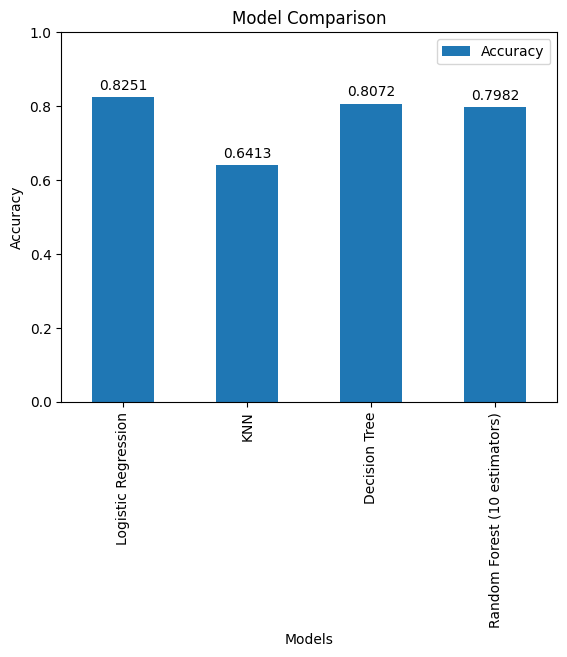

In [ ]:
# Create a dictionary with model scores
model_scores = {
    "Logistic Regression": LR_score,
    "KNN": KNN_score,
    "Decision Tree": score2,
    "Random Forest (10 estimators)": RF_score1
}

# Convert the dictionary into a DataFrame
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

# Create a bar plot
ax = model_compare.T.plot.bar()
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)  # Set y-axis limit for better visualization
plt.legend(["Accuracy"])

# Add accuracy values on top of the bars
for i, v in enumerate(model_compare.T["accuracy"]):
    ax.text(i, v + 0.02, f"{v:.4f}", ha="center")

plt.show()

In [ ]:
print(f"Logistic Regression: {LR_score:.4f}")
print(f"KNN: {KNN_score:.4f}")
print(f"Decision Tree: {score2:.4f}")
print(f"Random Forest: {RF_score1:.4f}")

Logistic Regression: 0.8161
KNN: 0.6413
Decision Tree: 0.8072
Random Forest: 0.7982


''

==> It's evident that the Logistic Regression model achieved the highest accuracy, showcasing its strong predictive capability. While Random Forest and Decision Tree models follow closely, the clear advantage of Logistic Regression in accuracy suggests its superior performance on this dataset.